# Algoritmo K-means

In [4]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Implementación

In [5]:
from haversine import haversine
import numpy as np
import pandas as pd
import random

# Cargar Coordenadas y Producción
coord_df = pd.read_excel('Coordenadas.xlsx', sheet_name = 'Hoja1')
produccion = pd.read_excel('Produccion.xlsx', sheet_name = 'Hoja1')

ejeX = list(coord_df['Longitud'])
ejeY = list(coord_df['Latitud'])
u = []
for j in range(len(ejeX)):
  u.append((ejeY[j], ejeX[j]))

# Número de clusters K
K = 11

# Crear de forma aleatoria los K centroides
centrosIniciales = []
for i in range(K):
  aleLat = ((7.05741183333 - 6.506139) * random.uniform(0, 1) + 6.506139)
  aleLong = ((-71.100278 - (-71.8766945)) * random.uniform(0, 1) + (-71.8766945))
  centrosIniciales.append((aleLat, aleLong))

# Inicialzizar diccionario con los centros de cada cluster
# Este guardará las coordenadas de la finca junto con su producción
dictClusters = {}
for centroide in centrosIniciales:
  dictClusters[centroide] = []

# ======================================================================================== #
# Proceso iterativo par agregar cada finca a su cluster más cercano de menor producción
# ======================================================================================== #
for fincaAct in u:
  listaCentroides = list(dictClusters.keys())
  listaDistFincaACentros = []
  for centro in listaCentroides:
    # Vector con las distancias entre la finca actual y todos los centroides actuales
    listaDistFincaACentros.append(haversine(fincaAct, centro))
  # Se asigna la finca al centroide más cercano
  distanciaMin = min(listaDistFincaACentros)
  posiDist = listaDistFincaACentros.index(distanciaMin)
  dictClusters[listaCentroides[posiDist]].append(fincaAct)
   # Actualizar el centroide al que le fue asignado la finca actual
  suma0 = listaCentroides[posiDist][0]
  suma1 = listaCentroides[posiDist][1]
  cont = 1
  for fincas in dictClusters[listaCentroides[posiDist]]:
    suma0 += fincas[0]
    suma1 += fincas[1]
    cont += 1
  # El nuevo centroide es un promedio de las coordenadas guardadas
  nuevoCentro = ((suma0)/cont, (suma1)/cont) 
  dictClusters[nuevoCentro] = dictClusters[listaCentroides[posiDist]]
  del dictClusters[listaCentroides[posiDist]]

# Imprimir resultados: Coordenadas Clusters y Producción total
print('Coordenadas Clusters y Producción total \n')
listaCentroides = list(dictClusters.keys())
for centroide in listaCentroides:
  print(f'Coords: {round(centroide[0], 3)}, {round(centroide[1], 3)}   ----\t NFincas: {len(dictClusters[centroide])}')

Coordenadas Clusters y Producción total 

Coords: 6.788, -71.262   ----	 NFincas: 0
Coords: 6.524, -71.416   ----	 NFincas: 6
Coords: 6.63, -71.429   ----	 NFincas: 3
Coords: 6.605, -71.674   ----	 NFincas: 8
Coords: 6.673, -71.23   ----	 NFincas: 7
Coords: 6.674, -71.758   ----	 NFincas: 8
Coords: 6.617, -71.537   ----	 NFincas: 15
Coords: 6.851, -71.507   ----	 NFincas: 10
Coords: 6.953, -71.158   ----	 NFincas: 26
Coords: 6.993, -71.351   ----	 NFincas: 15
Coords: 6.904, -71.734   ----	 NFincas: 82


#### Resultados

##### Gráfica Clusters en el espacio

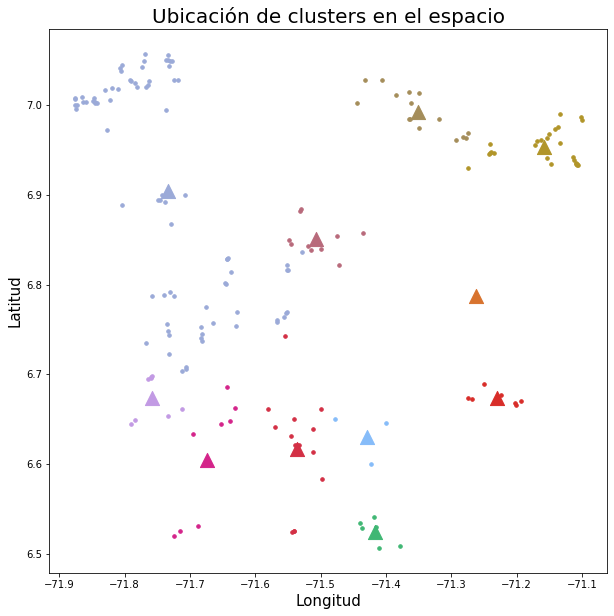

In [6]:
import matplotlib.pyplot as plt 
from matplotlib import markers
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for centroide in list(dictClusters.keys()):
  tuplaColor = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
  plt.scatter(centroide[1], centroide[0], color = tuplaColor, marker = "^", s = 200)
  for finca in dictClusters[centroide]:
    plt.scatter(finca[1], finca[0], color = tuplaColor, marker = ".", s = 50)

plt.xlabel('Longitud', fontsize = 15)
plt.ylabel('Latitud', fontsize = 15)
plt.title('Ubicación de clusters en el espacio', fontsize = 20)
plt.show()

##### Gráfica Suma de Errores [Distancias]

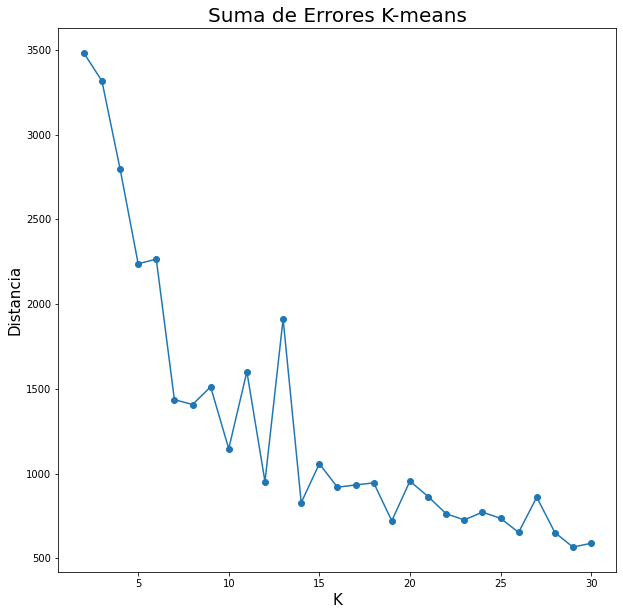

In [7]:
k = 30
distVector = []
for K in range(2, k+1):
  # Crear de forma aleatoria los K centroides
  centrosIniciales = []
  for i in range(K):
    aleLat = ((7.05741183333 - 6.506139) * random.uniform(0, 1) + 6.506139)
    aleLong = ((-71.100278 - (-71.8766945)) * random.uniform(0, 1) + (-71.8766945))
    centrosIniciales.append((aleLat, aleLong))
  # Inicialzizar diccionario con los centros de cada cluster
  # Este guardará las coordenadas de la finca junto con su producción
  dictClusters = {}
  for centroide in centrosIniciales:
    dictClusters[centroide] = []

  # ======================================================================================== #
  # Proceso iterativo par agregar cada finca a su cluster más cercano de menor producción
  # ======================================================================================== #
  for fincaAct in u:
    listaCentroides = list(dictClusters.keys())
    listaDistFincaACentros = []
    for centro in listaCentroides:
      # Vector con las distancias entre la finca actual y todos los centroides actuales
      listaDistFincaACentros.append(haversine(fincaAct, centro))
    # Se asigna la finca al centroide más cercano
    distanciaMin = min(listaDistFincaACentros)
    posiDist = listaDistFincaACentros.index(distanciaMin)
    dictClusters[listaCentroides[posiDist]].append(fincaAct)
    # Actualizar el centroide al que le fue asignado la finca actual
    suma0 = listaCentroides[posiDist][0]
    suma1 = listaCentroides[posiDist][1]
    cont = 1
    for fincas in dictClusters[listaCentroides[posiDist]]:
      suma0 += fincas[0]
      suma1 += fincas[1]
      cont += 1
    nuevoCentro = ((suma0)/cont, (suma1)/cont) # El nuevo centroide es un promedio de las coordenadas guardadas
    dictClusters[nuevoCentro] = dictClusters[listaCentroides[posiDist]]
    del dictClusters[listaCentroides[posiDist]]
  # Calcular la distancia total de la iteración actual (distancia de cada finca a su centroide)
  distTotal = 0
  for llave in list(dictClusters.keys()):
    listaFincas = dictClusters[llave]
    for fincaAct in listaFincas:
      distTotal += haversine(fincaAct, llave)
  # Guardar el valor de la distancia
  distVector.append(distTotal)

# Graficar
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter([i for i in range(2, k+1)], distVector)
plt.plot([i for i in range(2, k+1)], distVector)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Distancia', fontsize = 15)
plt.title('Suma de Errores K-means', fontsize = 20)
plt.show()

##### Gráfica Coeficientes de Silhouette

Coeficientes de silhouette:
K = 2 -> coeficiente = 0.5112284965633271
K = 3 -> coeficiente = 0.5320055474261873
K = 4 -> coeficiente = 0.39631642678424417
K = 5 -> coeficiente = 0.30760241861364407
K = 6 -> coeficiente = 0.33745094773383655
K = 7 -> coeficiente = 0.4528257070571951
K = 8 -> coeficiente = 0.40210983532432526
K = 9 -> coeficiente = 0.5147908881440333
K = 10 -> coeficiente = 0.5281395279913348
K = 11 -> coeficiente = 0.36498143629023416
K = 12 -> coeficiente = 0.5153454179882099
K = 13 -> coeficiente = 0.45021078221875643
K = 14 -> coeficiente = 0.43320279803109607
K = 15 -> coeficiente = 0.46745816733946494
K = 16 -> coeficiente = 0.4591070772697009
K = 17 -> coeficiente = 0.4419922175497453
K = 18 -> coeficiente = 0.43860140283502513
K = 19 -> coeficiente = 0.4420251409728682
K = 20 -> coeficiente = 0.4325138587610149
K = 21 -> coeficiente = 0.5012688970537064
K = 22 -> coeficiente = 0.4829782369361399
K = 23 -> coeficiente = 0.503075841554788
K = 24 -> coeficiente = 0.

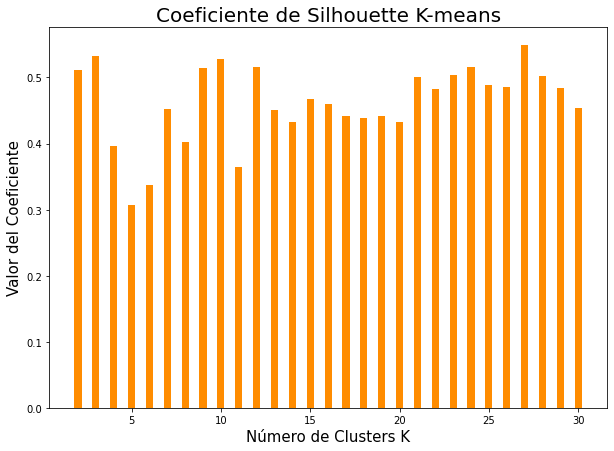

In [8]:
k = 30
silhouette = []
for K in range(2, k+1):
  # Crear de forma aleatoria los K centroides
  centrosIniciales = []
  for i in range(K):
    aleLat = ((7.05741183333 - 6.506139) * random.uniform(0, 1) + 6.506139)
    aleLong = ((-71.100278 - (-71.8766945)) * random.uniform(0, 1) + (-71.8766945))
    centrosIniciales.append((aleLat, aleLong))
  # Inicialzizar diccionario con los centros de cada cluster
  # Este guardará las coordenadas de la finca junto con su producción
  dictClusters = {}
  for centroide in centrosIniciales:
    dictClusters[centroide] = []

  # ======================================================================================== #
  # Proceso iterativo par agregar cada finca a su cluster más cercano de menor producción
  # ======================================================================================== #
  for fincaAct in u:
    listaCentroides = list(dictClusters.keys())
    listaDistFincaACentros = []
    for centro in listaCentroides:
      # Vector con las distancias entre la finca actual y todos los centroides actuales
      listaDistFincaACentros.append(haversine(fincaAct, centro))
    # Se asigna la finca al centroide más cercano
    distanciaMin = min(listaDistFincaACentros)
    posiDist = listaDistFincaACentros.index(distanciaMin)
    dictClusters[listaCentroides[posiDist]].append(fincaAct)
    # Actualizar el centroide al que le fue asignado la finca actual
    suma0 = listaCentroides[posiDist][0]
    suma1 = listaCentroides[posiDist][1]
    cont = 1
    for fincas in dictClusters[listaCentroides[posiDist]]:
      suma0 += fincas[0]
      suma1 += fincas[1]
      cont += 1
    nuevoCentro = ((suma0)/cont, (suma1)/cont) # El nuevo centroide es un promedio de las coordenadas guardadas
    dictClusters[nuevoCentro] = dictClusters[listaCentroides[posiDist]]
    del dictClusters[listaCentroides[posiDist]]
  
  vectA = []
  # Cálculo de la cohesión (a(i))
  for llave in list(dictClusters.keys()):
    listaFincasAct = dictClusters[llave] # Lista de las fincas asignadas al cluster actual
    nFincas = len(listaFincasAct) - 1 # Cantidad de fincas para promediar la distancia (sin contar la actual)
    if nFincas > 0:
      for fincaAct in listaFincasAct: # Doble recorrido para calcular distancia entre cada finca y el resto en el cluster
        sumaDistancias = 0
        for finca in listaFincasAct:
          sumaDistancias += haversine(fincaAct, finca)
        promedioDist = sumaDistancias / nFincas # Promediar la distancia de cada finca a las demás 
        vectA.append((u.index(fincaAct), promedioDist))

  vectB = []
  # Cálculo de la separación (b(i))
  for llave in list(dictClusters.keys()):
    listaFincasAct = dictClusters[llave] # Lista de las fincas asignadas al cluster actual
    for fincaAct in listaFincasAct: # Finca actual evaluada en relación con las demás de los away clusters
      listaPromedios = []
      for llave2 in list(dictClusters.keys()): # Recorrer los otros clusters formados
        if llave != llave2:
          sumaDistanciasCluster = 0 
          listaFincasAwayCluster = dictClusters[llave2] # Lista de las fincas asignadas a cada cluster diferente al actual
          nFincas = len(listaFincasAwayCluster) # Cantidad de fincas para promediar la distancia en el away cluster
          if nFincas > 0:
            for finca in listaFincasAwayCluster:
              sumaDistanciasCluster += haversine(fincaAct, finca)
            promedioDistCluster = sumaDistanciasCluster / nFincas # Promediar la distancia de cada finca a las demás 
            listaPromedios.append(promedioDistCluster) # Agregar el promedio de distancia de la finca actual a las fincas en el away cluster
      # Se guarda el mínimo de promedios entre la finca actual y los away clusters evaluados
      vectB.append((u.index(fincaAct), min(listaPromedios)))

  # Coeficiente de Silhouette por cada finca
  coefSilhouFincas = []
  suma = 0
  for fink in range(len(vectA)):
    a = vectA[fink][1]
    b = vectB[fink][1]
    c_i = (b - a) / max(a, b)
    coefSilhouFincas.append(c_i)
  # Coeficiente de Silhouette de la iteración actual
  silhouette.append((sum(coefSilhouFincas)/len(coefSilhouFincas)))

print('Coeficientes de silhouette:')
p = 0
for K in range(2, k+1):
  print(f'K = {K} -> coeficiente = {silhouette[p]}')
  p += 1
print('\n')

je = 0
for a in silhouette:
  if a > 0.5:
    je += 1
print('Porcentaje de clusters que superan el 5%: ', je/len(silhouette))
print('\n')

# Gráfica del Coeficiente para cada K
ks = [a for a in range(2, k+1)]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(ks, silhouette, color ='darkorange', width = 0.4)
plt.xlabel('Número de Clusters K', fontsize = 15)
plt.ylabel('Valor del Coeficiente', fontsize = 15)
plt.title('Coeficiente de Silhouette K-means', fontsize = 20)
plt.show()